# Reading Data In

In [1]:
import pandas as pd
import numpy as np
import fcsparser 
import os

In [2]:
root = "/g/data/rm11/rebekah_analysis/"
os.chdir(root)

In [14]:
all_overviews = os.listdir("allbatches_concats_overview/")
all_restims = os.listdir("allfiles_restim/")
tcell_overviews = [
    "allbatches_concats_overview/" + file for file in all_overviews if "Tcells" in file]
myeloids_overviews = [
    "allbatches_concats_overview/" + file for file in all_overviews if "myeloids" in file]
restims = [
    "allfiles_restim/" + file for file in all_restims]

In [18]:
peptide_overviews = [file for file in all_overviews if "Batch4" not in file and "Batch6" not in file]
peptide_tcell_overviews = [
    "allbatches_concats_overview/" + file for file in peptide_overviews if "Tcells" in file]
peptide_myeloids_overviews = [
    "allbatches_concats_overview/" + file for file in peptide_overviews if "myeloids" in file]

In [24]:
batch4_restim_marker_dict = {
    "FSC-A" : "FSC-A", 
    "SSC-A" : "SSC-A", 
    "FJComp-APC-A" : "IFNy",  
    "FJComp-APC-Cy7-A" : "LD", 
    "FJComp-Alexa Fluor 488-A" : "FOXP3",
    "FJComp-Alexa Fluor 700-A" : "IL17", 
    "FJComp-BUV 395-A" : "CD8", 
    "FJComp-Brilliant UV 395-A" : "CD8", 
    # "FJComp-BUV737-A" : "B220",
    "FJComp-BV605-A" : "CD4",
    "FJComp-PE-A" : "GMCSF",
    "FJComp-PE 561-A" : "GMCSF",
    # "FJComp-PE-Cy7-A" : "CD4",
    "FJComp-Pacific Blue-A" : "CD44",
    "FJComp-BV421-A" : "CD44",
    "FJComp-PerCP-A" : "CD3",
    "FJComp-PerCP-Cy5-5-A" : "CD3",
    "FJComp-FITC-A" : "CD3" }

batch4_marker_dict = {
    "FSC-A" : "FSC-A", 
    "SSC-A" : "SSC-A", 
    "FJComp-APC-A" : "CD11B",  
    "FJComp-APC-Cy7-A" : "LD", 
    "FJComp-Alexa Fluor 700-A" : "CD4", 
    "FJComp-BV421-A" : "CD3", 
    "FJComp-BV605-A" : "B220",  
    "FJComp-PE-CY7 561-A" : "CD11C",
    "FJComp-PE-Cy7-A" : "CD11C",
    "FJComp-PerCP-Cy5-5-A" : "Ly6C"
}

batch8_marker_dict = {
    "FSC-A" : "FSC-A", 
    "SSC-A" : "SSC-A", 
    "FJComp-APC-A" : "CD11C",  
    "FJComp-APC-Cy7-A" : "LD", 
    "FJComp-Alexa Fluor 700-A" : "CD4", 
    "FJComp-BUV737-A" : "B220",
    "FJComp-BV421-A" : "CD44",
    "FJComp-BV510-A" : "CD19",
    "FJComp-Brilliant UV 395-A" : "Ly6G", 
    "FJComp-BV605-A" : "CD11B",  
    "FJComp-FITC-A" : "CD3" , 
    "FJComp-PE-CY7 561-A" : "Ly6C"}

markers = [batch8_marker_dict.get(key) for key in batch8_marker_dict.keys()]

meta_columns = [
    "*Batch",
    "*Mouse ID#", 
    "*Week", 
    "*Strain (CR=0, JAX=1)", 
    "*Condition",
    "*Concentration (low=0,high=1,DMSO=2)"
]

In [23]:
# Function to extract all the relevant rows, rank transform them, and then rename the colomns
# Also drops the metadata lost columns (dunno why this happened with Flowjo) 

def extract_columns(df, fluoro_marker_dict, zero_column, markers, meta_columns, name):
    print(name)
    if "Batch6" in name or "Batch4" in name: 
        try: 
            df["*Week"] = df["*Bleed timepoint (wpi): n.b. week - 1 = 0"]
            df.drop(columns = "*Bleed timepoint (wpi): n.b. week - 1 = 0", inplace = True)
        except: 
            pass 
        try: 
            df["*Batch"] = df["*Batch #"]
            df.drop(columns = "*Batch #", inplace = True)
        except: 
            pass
    df.drop(df[df[zero_column] == 0].index, inplace = True) 
    df.rename(columns = fluoro_marker_dict, inplace = True)
    for fluoro in fluoro_marker_dict: 
        marker = fluoro_marker_dict.get(fluoro)
        column = df.loc[:, marker]
        df.loc[:, marker] = column.rank()/len(df.loc[:, marker])
    return df[markers + meta_columns]

In [7]:
restim_tcells = [extract_columns(
    df = fcsparser.parse(root + sample)[1], 
    fluoro_marker_dict = batch4_restim_marker_dict,
    zero_column = "*Batch",
    markers = markers,
    name = sample, 
    meta_columns = meta_columns) for sample in restims if "Tcells" in sample]

allfiles_restim/Batch6_restim_week1_Tcells_concat_1.fcs
allfiles_restim/Batch4_restim_week1_Tcells_concat_1.fcs
allfiles_restim/Batch6_restim_week7_Tcells_concat_1.fcs
allfiles_restim/Batch4_restim_week0_Tcells_concat_1.fcs
allfiles_restim/Batch6_restim_week0_Tcells_concat_1.fcs


In [8]:
restim_live = [extract_columns(
    df = fcsparser.parse(root + sample)[1], 
    fluoro_marker_dict = batch4_restim_marker_dict,
    zero_column = "*Batch",
    markers = markers,
    name = sample, 
    meta_columns = meta_columns) for sample in restims if "liveSC" in sample]

allfiles_restim/Batch6_restim_week0_liveSCs_concat_1.fcs
allfiles_restim/Batch4_restim_week1_liveSCs_concat_1.fcs
allfiles_restim/Batch4_restim_week7_liveSCs_concat_1.fcs
allfiles_restim/Batch6_restim_week1_liveSCs_concat_1.fcs
allfiles_restim/Batch6_restim_week7_liveSCs_concat_1.fcs
allfiles_restim/Batch4_restim_week0_liveSCs_concat_1.fcs


In [31]:
peptide_tcells_overview = [extract_columns(
    df = fcsparser.parse(root + sample)[1], 
    fluoro_marker_dict = batch8_marker_dict,
    zero_column = "*Batch", 
    markers = markers,
    name = sample, 
    meta_columns = meta_columns) for sample in peptide_tcell_overviews if "Batch4" not in sample and "Batch6" not in sample]

allbatches_concats_overview/Batch8_Tcells_Week1_concat_1.fcs
allbatches_concats_overview/Batch10_Tcells_week1_concat_1.fcs
allbatches_concats_overview/Batch10_Tcells_week0_concat_1.fcs
allbatches_concats_overview/Batch8_Tcells_Week4_concat_1.fcs
allbatches_concats_overview/Batch8_Tcells_Week7_concat_1.fcs
allbatches_concats_overview/Batch7_Tcells_week1_concat_1.fcs
allbatches_concats_overview/Batch8_Tcells_Week0_concat_1.fcs
allbatches_concats_overview/Batch7_Tcells_week4_concat_1.fcs
allbatches_concats_overview/Batch11_Tcells_week0_concat_1.fcs
allbatches_concats_overview/Batch11_Tcells_week1_concat_1.fcs
allbatches_concats_overview/Batch7_Tcells_week7_concat_1.fcs
allbatches_concats_overview/Batch11_Tcells_week7_concat_1.fcs
allbatches_concats_overview/Batch7_Tcells_week0_concat_1.fcs
allbatches_concats_overview/Batch10_Tcells_week4_concat_1.fcs
allbatches_concats_overview/Batch10_Tcells_Week7_concat_1.fcs


In [32]:
peptide_tcells_overview = pd.concat(peptide_tcells_overview).reset_index()
peptide_tcells_overview.to_csv(root + "peptide_tcells_overview.csv", index = False)

In [33]:
peptide_myeloids_overview = [extract_columns(
    df = fcsparser.parse(root + sample)[1], 
    fluoro_marker_dict = batch8_marker_dict,
    zero_column = "*Batch",
    markers = markers,
    name = sample, 
    meta_columns = meta_columns) for sample in myeloids_overviews if "Batch4" not in sample and "Batch6" not in sample]

allbatches_concats_overview/Batch10_myeloids_week0_concat_1.fcs
allbatches_concats_overview/Batch10_myeloids_week1_concat_1.fcs
allbatches_concats_overview/Batch8_myeloids_Week7_concat_1.fcs
allbatches_concats_overview/Batch7_myeloids_week1_concat_1.fcs
allbatches_concats_overview/Batch11_myeloids_week7_concat_1.fcs
allbatches_concats_overview/Batch8_myeloids_Week0_concat_1.fcs
allbatches_concats_overview/Batch10_myeloids_week4_concat_1.fcs
allbatches_concats_overview/Batch7_myeloids_week4_concat_1.fcs
allbatches_concats_overview/Batch7_myeloids_week0_concat_1.fcs
allbatches_concats_overview/Batch11_myeloids_week0_concat_1.fcs
allbatches_concats_overview/Batch10_myeloids_Week7_concat_1.fcs
allbatches_concats_overview/Batch7_myeloids_week7_concat_1.fcs
allbatches_concats_overview/Batch11_myeloids_week1_concat_1.fcs
allbatches_concats_overview/Batch8_myeloids_Week1_concat_1.fcs
allbatches_concats_overview/Batch8_myeloids_Week4_concat_1.fcs


In [34]:
peptide_myeloids_overview = pd.concat(peptide_myeloids_overview).reset_index()
peptide_myeloids_overview.to_csv(root + "peptide_myeloids_overview.csv", index = False)

# Batch Normalisation

In [35]:
import harmony
import os
import numpy as np
import pandas as pd

root = "/g/data/rm11/rebekah_analysis/"
os.chdir(root)
meta_columns = [
    "*Batch",
    "*Mouse ID#", 
    "*Week", 
    "*Strain (CR=0, JAX=1)", 
    "*Condition",
    "*Concentration (low=0,high=1,DMSO=2)"
]

batch4_restim_marker_dict = {
    "FSC-A" : "FSC-A", 
    "SSC-A" : "SSC-A", 
    "FJComp-APC-A" : "IFNy",  
    "FJComp-APC-Cy7-A" : "LD", 
    "FJComp-Alexa Fluor 488-A" : "FOXP3",
    "FJComp-Alexa Fluor 700-A" : "IL17", 
    "FJComp-BUV 395-A" : "CD8", 
    "FJComp-Brilliant UV 395-A" : "CD8", 
    "FJComp-BV605-A" : "CD4",
    "FJComp-PE-A" : "GMCSF",
    "FJComp-PE 561-A" : "GMCSF",
    "FJComp-Pacific Blue-A" : "CD44",
    "FJComp-BV421-A" : "CD44",
    "FJComp-PerCP-A" : "CD3",
    "FJComp-PerCP-Cy5-5-A" : "CD3",
    "FJComp-FITC-A" : "CD3" }

batch8_marker_dict = {
    "FSC-A" : "FSC-A", 
    "SSC-A" : "SSC-A", 
    "FJComp-APC-A" : "CD11C",  
    "FJComp-APC-Cy7-A" : "LD", 
    "FJComp-Alexa Fluor 700-A" : "CD4", 
    "FJComp-BUV737-A" : "B220",
    "FJComp-BV605-A" : "CD11B",  
    "FJComp-FITC-A" : "CD3" , 
    "FJComp-PE-CY7 561-A" : "Ly6C"}

peptide_marker_dict = {
    "FSC-A" : "FSC-A", 
    "SSC-A" : "SSC-A", 
    "FJComp-APC-A" : "CD11C",  
    "FJComp-APC-Cy7-A" : "LD", 
    "FJComp-Alexa Fluor 700-A" : "CD4", 
    "FJComp-BUV737-A" : "B220",
    "FJComp-BV421-A" : "CD44",
    "FJComp-BV510-A" : "CD19",
    "FJComp-Brilliant UV 395-A" : "Ly6G", 
    "FJComp-BV605-A" : "CD11B",  
    "FJComp-FITC-A" : "CD3" , 
    "FJComp-PE-CY7 561-A" : "Ly6C"}

markers = [peptide_marker_dict.get(key) for key in peptide_marker_dict.keys()]
markers = list(set(markers)) 

In [14]:
restims_tcells = pd.read_csv(root + "all_restims_tcells.csv")
restims_tcells.drop(["CD8.1", "CD44.1", "GMCSF.1", "CD3.1", "CD3.2"], axis =1 , inplace = True)

restims_tcells_harmonised = harmony.harmonize(
    restims_tcells[markers].values, 
    restims_tcells[meta_columns], 
    n_clusters = 30,
    max_iter_harmony = 20,
    batch_key = ["*Batch", "*Week"], 
    use_gpu=True, verbose= True)

Use GPU mode.
	Initialising is commencing.
Using minibatch Kmeans
used 100 iterations (7.779s) to cluster 3013773 items into 30 clusters


/home/150/tx2668/.local/lib/python3.9/site-packages/harmony/harmony.py:301: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(kmeans.centroids, dtype=torch.float32, device=device_type)


	Initialization is completed.
	Completed 1 / 20 iteration(s).
	Completed 2 / 20 iteration(s).
	Completed 3 / 20 iteration(s).
	Completed 4 / 20 iteration(s).
	Completed 5 / 20 iteration(s).
	Completed 6 / 20 iteration(s).
Reach convergence after 6 iteration(s).


In [15]:
restims_lives = pd.read_csv(root + "all_restims_lives.csv")
restims_lives.drop(["CD8.1", "CD44.1", "GMCSF.1", "CD3.1", "CD3.2"], axis =1 , inplace = True)

restims_lives_harmonised = harmony.harmonize(
    restims_lives[markers].values, 
    restims_lives[meta_columns], 
    n_clusters = 30,
    max_iter_harmony = 20,
    batch_key = ["*Batch", "*Week"], 
    use_gpu=True, verbose= True)

Use GPU mode.
	Initialising is commencing.
Using minibatch Kmeans
used 100 iterations (40.476s) to cluster 11231745 items into 30 clusters
	Initialization is completed.


/home/150/tx2668/.local/lib/python3.9/site-packages/harmony/harmony.py:301: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(kmeans.centroids, dtype=torch.float32, device=device_type)


	Completed 1 / 20 iteration(s).
	Completed 2 / 20 iteration(s).
Reach convergence after 2 iteration(s).


In [19]:
restims_tcells_harmonised = pd.DataFrame(restims_tcells_harmonised, columns = markers)
restims_lives_harmonised = pd.DataFrame(restims_lives_harmonised, columns = markers)

pd.concat([restims_tcells_harmonised, restims_tcells[meta_columns]], axis = 1).to_csv("all_restims_tcells_harmonised.csv", index = False)
pd.concat([restims_lives_harmonised, restims_lives[meta_columns]], axis = 1).to_csv("all_restims_lives_harmonised.csv", index = False)

In [36]:
tcells = pd.read_csv(root + "peptide_tcells_overview.csv")

tcells_harmonised = harmony.harmonize(
    tcells[markers].values, 
    tcells[meta_columns], 
    n_clusters = 30,
    max_iter_harmony = 20,
    batch_key = ["*Batch", "*Week"], 
    use_gpu=True, verbose= True)

Use GPU mode.
	Initialising is commencing.
Using minibatch Kmeans
used 100 iterations (27.5033s) to cluster 8652453 items into 30 clusters


/home/150/tx2668/.local/lib/python3.9/site-packages/harmony/harmony.py:301: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(kmeans.centroids, dtype=torch.float32, device=device_type)


	Initialization is completed.
	Completed 1 / 20 iteration(s).
	Completed 2 / 20 iteration(s).
	Completed 3 / 20 iteration(s).
	Completed 4 / 20 iteration(s).
	Completed 5 / 20 iteration(s).
	Completed 6 / 20 iteration(s).
	Completed 7 / 20 iteration(s).
	Completed 8 / 20 iteration(s).
	Completed 9 / 20 iteration(s).
Reach convergence after 9 iteration(s).


In [37]:
tcells_harmonised = pd.DataFrame(tcells_harmonised, columns = markers)
pd.concat([tcells_harmonised, tcells[meta_columns]], axis = 1).to_csv("peptide_tcells_harmonised.csv", index = False)

In [39]:
myeloids = pd.read_csv(root + "peptide_myeloids_overview.csv")
myeloids_harmonised = harmony.harmonize(
    myeloids[markers].values, 
    myeloids[meta_columns], 
    n_clusters = 30,
    max_iter_harmony = 20,
    batch_key = ["*Batch", "*Week"], 
    use_gpu=True, verbose= True)

Use GPU mode.
	Initialising is commencing.
Using minibatch Kmeans
used 100 iterations (52.9932s) to cluster 14238550 items into 30 clusters
	Initialization is completed.


/home/150/tx2668/.local/lib/python3.9/site-packages/harmony/harmony.py:301: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(kmeans.centroids, dtype=torch.float32, device=device_type)


	Completed 1 / 20 iteration(s).
	Completed 2 / 20 iteration(s).
	Completed 3 / 20 iteration(s).
	Completed 4 / 20 iteration(s).
	Completed 5 / 20 iteration(s).
	Completed 6 / 20 iteration(s).
Reach convergence after 6 iteration(s).


In [40]:
myeloids_harmonised = pd.DataFrame(myeloids_harmonised, columns = markers)
pd.concat(
    [myeloids_harmonised, myeloids[meta_columns]], axis = 1).to_csv("peptide_myeloids_harmonised.csv", index = False)

# FlowSOM Python

In [1]:
import pandas as pd
import numpy as np
from flowsom import flowsom
import os 

root = "/g/data/rm11/rebekah_analysis/"
os.chdir(root)

batch4_restim_marker_dict = {
    "FSC-A" : "FSC-A", 
    "SSC-A" : "SSC-A", 
    "FJComp-APC-A" : "IFNy",  
    "FJComp-APC-Cy7-A" : "LD", 
    "FJComp-Alexa Fluor 488-A" : "FOXP3",
    "FJComp-Alexa Fluor 700-A" : "IL17", 
    "FJComp-BUV 395-A" : "CD8", 
    "FJComp-Brilliant UV 395-A" : "CD8", 
    "FJComp-BV605-A" : "CD4",
    "FJComp-PE-A" : "GMCSF",
    "FJComp-PE 561-A" : "GMCSF",
    "FJComp-Pacific Blue-A" : "CD44",
    "FJComp-BV421-A" : "CD44",
    "FJComp-PerCP-A" : "CD3",
    "FJComp-PerCP-Cy5-5-A" : "CD3",
    "FJComp-FITC-A" : "CD3" }

meta_columns = [
    "*Batch",
    "*Mouse ID#", 
    "*Week", 
    "*Strain (CR=0, JAX=1)", 
    "*Condition",
    "*Concentration (low=0,high=1,DMSO=2)"
]

peptide_marker_dict = {
    "FSC-A" : "FSC-A", 
    "SSC-A" : "SSC-A", 
    "FJComp-APC-A" : "CD11C",  
    "FJComp-APC-Cy7-A" : "LD", 
    "FJComp-Alexa Fluor 700-A" : "CD4", 
    "FJComp-BUV737-A" : "B220",
    "FJComp-BV421-A" : "CD44",
    "FJComp-BV510-A" : "CD19",
    "FJComp-Brilliant UV 395-A" : "Ly6G", 
    "FJComp-BV605-A" : "CD11B",  
    "FJComp-FITC-A" : "CD3" , 
    "FJComp-PE-CY7 561-A" : "Ly6C"}

markers = [peptide_marker_dict.get(key) for key in peptide_marker_dict.keys()]
markers = list(set(markers)) 

In [21]:
restim_tcells = pd.read_csv(root + "all_restims_tcells_harmonised.csv")
restim_lives = pd.read_csv(root + "all_restims_lives_harmonised.csv")

In [23]:
opposite_markers = [column for column in restim_tcells.columns if column not in markers]

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.42347540507150616

...ready!
10
10
0 samples done...
10000 samples done...
20000 samples done...
30000 samples done...
40000 samples done...
50000 samples done...
60000 samples done...
70000 samples done...
80000 samples done...
90000 samples done...
100000 samples done...
110000 samples done...
120000 samples done...
130000 samples done...
140000 samples done...
150000 samples done...
160000 samples done...
170000 samples done...
180000 samples done...
190000 samples done...
200000 samples done...
210000 samples done...
220000 samples done...
230000 samples done...
240000 samples done...
250000 samples done...
260000 samples done...
270000 samples done...
280000 samples done...
290000 samples done...
300000 samples done...
310000 samples done...
320000 samples done...
330000 samples done...
340000 samples done...
350000 samples done...
360000 samples done...
370000 samples done...
380000 samples done...
390000 samp

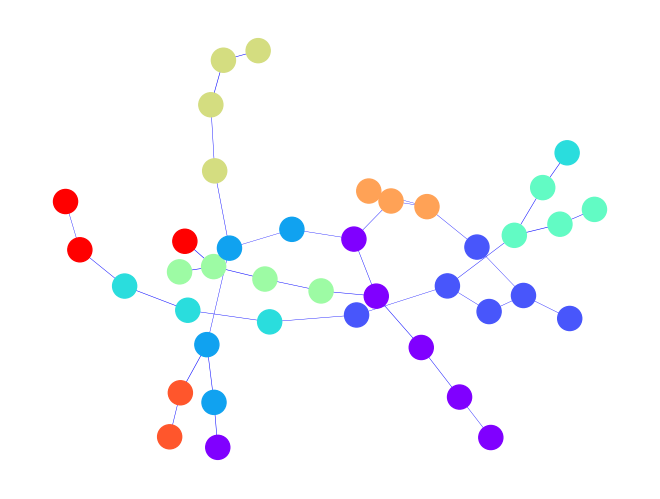

In [25]:
restim_tcell_fsom = flowsom(
    root + "all_restims_tcells_harmonised.csv",
    if_fcs = False, 
    if_drop = True, 
    drop_col = opposite_markers) 
restim_tcell_fsom.som_mapping(10, 10, len(markers), sigma=2.5, lr = 0.1, batch_size=100)  # trains SOM with 100 iterations   
from sklearn.cluster import AgglomerativeClustering
restim_tcell_fsom.meta_clustering(
    AgglomerativeClustering, 
    min_n=10, 
    max_n=15, 
    iter_n=3) # train the meta clustering for cluster in range(40,45)   
print(restim_tcell_fsom.bestk)
restim_tcell_fsom.vis(t=4, # the number of total nodes = t * bestk
       edge_color='b', 
       node_size=300, 
       with_labels=False)
restim_tcell_fsom.labeling()
restim_tcell_fsom_clusters = restim_tcell_fsom.df

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.41403820318499446

...ready!
10
13
0 samples done...
10000 samples done...
20000 samples done...
30000 samples done...
40000 samples done...
50000 samples done...
60000 samples done...
70000 samples done...
80000 samples done...
90000 samples done...
100000 samples done...
110000 samples done...
120000 samples done...
130000 samples done...
140000 samples done...
150000 samples done...
160000 samples done...
170000 samples done...
180000 samples done...
190000 samples done...
200000 samples done...
210000 samples done...
220000 samples done...
230000 samples done...
240000 samples done...
250000 samples done...
260000 samples done...
270000 samples done...
280000 samples done...
290000 samples done...
300000 samples done...
310000 samples done...
320000 samples done...
330000 samples done...
340000 samples done...
350000 samples done...
360000 samples done...
370000 samples done...
380000 samples done...
390000 samp

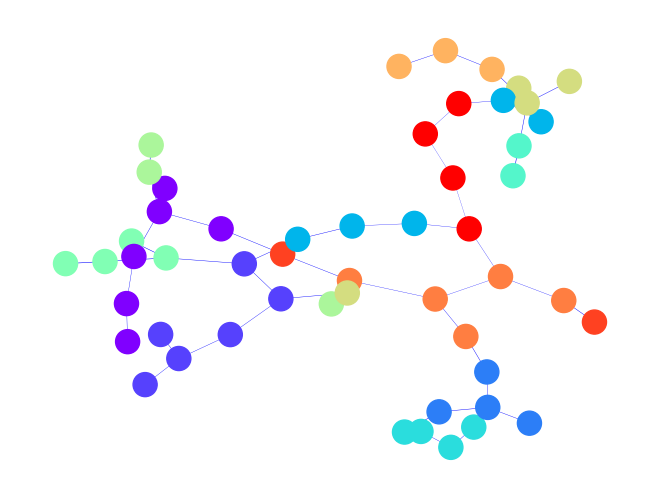

In [26]:
restim_lives_fsom = flowsom(
    root + "all_restims_lives_harmonised.csv",
    if_fcs = False, 
    if_drop = True, 
    drop_col = opposite_markers) 
restim_lives_fsom.som_mapping(10, 10, len(markers), sigma=2.5, lr = 0.1, batch_size=100)  # trains SOM with 100 iterations   
from sklearn.cluster import AgglomerativeClustering
restim_lives_fsom.meta_clustering(
    AgglomerativeClustering, 
    min_n=10, 
    max_n=15, 
    iter_n=3) # train the meta clustering for cluster in range(40,45)   
print(restim_tcell_fsom.bestk)
restim_lives_fsom.vis(t=4, # the number of total nodes = t * bestk
       edge_color='b', 
       node_size=300, 
       with_labels=False)
restim_lives_fsom.labeling()
restim_lives_fsom_clusters = restim_lives_fsom.df

In [44]:
restim_tcells["*category"] = restim_tcell_fsom_clusters["category"]
restim_lives["*category"] = restim_lives_fsom_clusters["category"]

In [45]:
output_columns = [
    'FSC-A',
    'SSC-A',
    'IFNy',
    'IL17',
    'CD8',
    'LD',
    'FOXP3',
    'CD44',
    'GMCSF',
    'CD4',
    'CD3']
output_columns = output_columns + meta_columns
output_columns.append("*category")

In [50]:
restim_tcells = restim_tcells[output_columns]
restim_lives = restim_lives[output_columns]

In [51]:
restim_tcells.to_csv(root + "all_restims_tcells_harmonised.csv", index = False)
restim_lives.to_csv(root + "all_restims_lives_harmonised.csv", index = False)

In [2]:
peptide_myeloids = pd.read_csv(root + "peptide_myeloids_harmonised.csv")

In [3]:
opposite_markers = [column for column in peptide_myeloids.columns if column not in markers]
opposite_markers.append("CD4")
opposite_markers.append("CD3")

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.36126014993548317

...ready!
11
11
0 samples done...
10000 samples done...
20000 samples done...
30000 samples done...
40000 samples done...
50000 samples done...
60000 samples done...
70000 samples done...
80000 samples done...
90000 samples done...
100000 samples done...
110000 samples done...
120000 samples done...
130000 samples done...
140000 samples done...
150000 samples done...
160000 samples done...
170000 samples done...
180000 samples done...
190000 samples done...
200000 samples done...
210000 samples done...
220000 samples done...
230000 samples done...
240000 samples done...
250000 samples done...
260000 samples done...
270000 samples done...
280000 samples done...
290000 samples done...
300000 samples done...
310000 samples done...
320000 samples done...
330000 samples done...
340000 samples done...
350000 samples done...
360000 samples done...
370000 samples done...
380000 samples done...
390000 samp

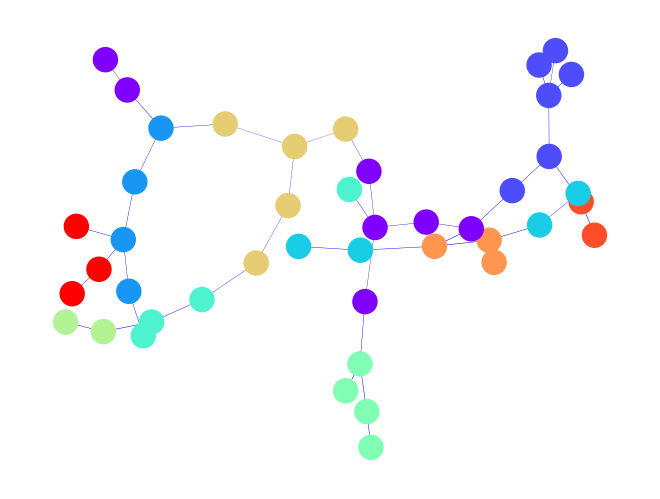

In [4]:
myeloids_cell_fsom = flowsom(
    root + "peptide_myeloids_harmonised.csv",
    if_fcs = False, 
    if_drop = True, 
    drop_col = opposite_markers) 
myeloids_cell_fsom.som_mapping(10, 10, 10, sigma=2.5, lr = 0.1, batch_size=100)  # trains SOM with 100 iterations    

from sklearn.cluster import AgglomerativeClustering
myeloids_cell_fsom.meta_clustering(
    AgglomerativeClustering, 
    min_n=10, 
    max_n=15, 
    iter_n=3) # train the meta clustering for cluster in range(40,45)   
print(myeloids_cell_fsom.bestk)
myeloids_cell_fsom.vis(t=4, # the number of total nodes = t * bestk
       edge_color='b', 
       node_size=300, 
       with_labels=False)
myeloids_cell_fsom.labeling()
myeloids_cell_clusters = myeloids_cell_fsom.df

In [5]:
peptide_myeloids["category"] = myeloids_cell_clusters["category"]

In [6]:
peptide_myeloids.to_csv(root + "peptide_myeloids_harmonisedwflowsom.csv", index = False)

# Transforming into FCS Files

In [1]:
import pandas as pd
import fcswrite
import os 

root = "/g/data/rm11/rebekah_analysis/"
os.chdir(root)

In [5]:
restim_tcells = pd.read_csv(root + "all_restims_tcells_harmonised_embeds0.csv")
restim_lives = pd.read_csv(root + "all_restims_lives_harmonised_embeds0.csv")

In [7]:
restim_tcells1 = pd.read_csv(root + "all_restims_tcells_harmonised_embeds1.csv")
restim_lives1 = pd.read_csv(root + "all_restims_lives_harmonised_embeds1.csv")

In [9]:
restim_tcells["UMAP_X_corr"] = restim_tcells1["UMAP_X"]
restim_tcells["UMAP_Y_corr"] = restim_tcells1["UMAP_Y"]
restim_lives["UMAP_X_corr"] = restim_lives1["UMAP_X"]
restim_lives["UMAP_X_corr"] = restim_lives1["UMAP_Y"]

In [10]:
fcswrite.write_fcs(
    filename = root + "all_restims_tcells_UMAP.fcs", 
    chn_names = list(restim_tcells.columns), 
    data = restim_tcells.values) 
fcswrite.write_fcs(
    filename = root + "all_restims_lives_UMAP.fcs", 
    chn_names = list(restim_lives.columns), 
    data = restim_lives.values) 

In [6]:
tcells_harmonised = pd.read_csv(root + "all_tcells_harmonised.csv")

In [4]:
myeloids_embeds = pd.read_csv(root + "peptide_myeloids_harmonisedwflowsom_embeds0.csv")
myeloids_embeds.columns

Index(['CD3', 'SSC-A', 'FSC-A', 'LD', 'Ly6C', 'CD4', 'CD44', 'CD19', 'CD11C',
       'B220', 'CD11B', 'Ly6G', '*Batch', '*Mouse ID#', '*Week',
       '*Strain (CR=0, JAX=1)', '*Condition',
       '*Concentration (low=0,high=1,DMSO=2)', 'category', 'UMAP_X', 'UMAP_Y'],
      dtype='object')

In [5]:
fcswrite.write_fcs(
    filename = root + "peptide_myeloids_UMAP.fcs", 
    chn_names = list(myeloids_embeds.columns), 
    data = myeloids_embeds.values) 

# Seperating out by Sample FCSs

In [1]:
import os
import pandas as pd
import fcswrite
import os 

root = "/g/data/rm11/rebekah_analysis/"
os.chdir(root)

In [15]:
restim_tcells.loc[restim_tcells["*Week"] == 30, "*Week"] = 7 
restim_tcells.loc[restim_tcells["*Week"] == 8, "*Week"] = 7

mouse_IDs = restim_tcells["*Mouse ID#"].unique()
weeks = restim_tcells["*Week"].unique()
batches = restim_tcells["*Batch"].unique()

In [16]:
for batch in batches:
    mouse_IDs = restim_tcells.loc[restim_tcells["*Batch"] == batch, "*Mouse ID#"].unique()
    for mouse_ID in mouse_IDs: 
        for week in weeks: 
            sample = restim_tcells.loc[
                (restim_tcells["*Mouse ID#"] == mouse_ID) & 
                (restim_tcells["*Week"] == week),:]
            if len(sample) == 0: 
                print(f"Skipping mouse {mouse_ID} in week {week}")
                continue
            print(f"The shape of this file is: {sample.shape} for mouse {mouse_ID} in batch {batch} in week {week}")
            batch = sample["*Batch"].iloc[0]
            condition = sample["*Condition"].iloc[0]
            sample.to_csv(root + "all_fcsfiles_restims/" + f"restims_tcells_b{batch}_week{week}_id{mouse_ID}_condition{condition}.csv")
            fcswrite.write_fcs(
                chn_names=list(sample.columns),
                data=sample.values, 
                filename = root + "all_fcsfiles_restims/" + f"restims_tcells_b{batch}_week{week}_id{mouse_ID}_condition{condition}.fcs")

The shape of this file is: (26927, 22) for mouse 615.0 in batch 6.0 in week 1.0
The shape of this file is: (6150, 22) for mouse 615.0 in batch 6.0 in week 7.0
Skipping mouse 615.0 in week 0.0
The shape of this file is: (24980, 22) for mouse 596.0 in batch 6.0 in week 1.0
The shape of this file is: (10409, 22) for mouse 596.0 in batch 6.0 in week 7.0
The shape of this file is: (14231, 22) for mouse 596.0 in batch 6.0 in week 0.0
The shape of this file is: (32219, 22) for mouse 597.0 in batch 6.0 in week 1.0
The shape of this file is: (6422, 22) for mouse 597.0 in batch 6.0 in week 7.0
The shape of this file is: (12651, 22) for mouse 597.0 in batch 6.0 in week 0.0
The shape of this file is: (27322, 22) for mouse 602.0 in batch 6.0 in week 1.0
The shape of this file is: (8157, 22) for mouse 602.0 in batch 6.0 in week 7.0
The shape of this file is: (14644, 22) for mouse 602.0 in batch 6.0 in week 0.0
The shape of this file is: (29667, 22) for mouse 609.0 in batch 6.0 in week 1.0
The shape 

In [17]:
restim_lives.loc[restim_lives["*Week"] == 30, "*Week"] = 7 
restim_lives.loc[restim_lives["*Week"] == 8, "*Week"] = 7

mouse_IDs = restim_lives["*Mouse ID#"].unique()
weeks = restim_lives["*Week"].unique()
batches = restim_lives["*Batch"].unique()

In [18]:
for batch in batches:
    mouse_IDs = restim_lives.loc[restim_lives["*Batch"] == batch, "*Mouse ID#"].unique()
    for mouse_ID in mouse_IDs: 
        for week in weeks: 
            sample = restim_lives.loc[
                (restim_lives["*Mouse ID#"] == mouse_ID) & 
                (restim_lives["*Week"] == week),:]
            if len(sample) == 0: 
                print(f"Skipping mouse {mouse_ID} in week {week} in batch {batch}")
                continue
            # print(f"The shape of this file is: {sample.shape} for mouse {mouse_ID} in batch {batch} in week {week}")
            batch = sample["*Batch"].iloc[0]
            condition = sample["*Condition"].iloc[0]
            sample.to_csv(root + "all_fcsfiles_restims/" + f"restims_lives_b{batch}_week{week}_id{mouse_ID}_condition{condition}.csv")
            fcswrite.write_fcs(
                chn_names=list(sample.columns),
                data=sample.values, 
                filename = root + "all_fcsfiles_restims/" + f"restims_lives_b{batch}_week{week}_id{mouse_ID}_condition{condition}.fcs")

Skipping mouse 23972.0 in week 7.0 in batch 6.0
Skipping mouse 610.0 in week 7.0 in batch 6.0
Skipping mouse 24000.0 in week 7.0 in batch 6.0
Skipping mouse 615.0 in week 0.0 in batch 6.0
Skipping mouse 13220.0 in week 7.0 in batch 4.0
Skipping mouse 13281.0 in week 7.0 in batch 4.0
Skipping mouse 13214.0 in week 7.0 in batch 4.0
Skipping mouse 13206.0 in week 7.0 in batch 4.0
Skipping mouse 13197.0 in week 7.0 in batch 4.0
Skipping mouse 13175.0 in week 7.0 in batch 4.0
Skipping mouse 13189.0 in week 7.0 in batch 4.0
Skipping mouse 13179.0 in week 7.0 in batch 4.0
Skipping mouse 13282.0 in week 7.0 in batch 4.0
Skipping mouse 13283.0 in week 7.0 in batch 4.0
Skipping mouse 13191.0 in week 7.0 in batch 4.0
Skipping mouse 13195.0 in week 7.0 in batch 4.0
Skipping mouse 13204.0 in week 7.0 in batch 4.0
Skipping mouse 13174.0 in week 7.0 in batch 4.0


In [2]:
peptide_myeloids = pd.read_csv(root + "peptide_myeloids_harmonisedwflowsom_embeds0.csv")

peptide_myeloids.loc[peptide_myeloids["*Week"] == 30, "*Week"] = 7 
peptide_myeloids.loc[peptide_myeloids["*Week"] == 8, "*Week"] = 7

mouse_IDs = peptide_myeloids["*Mouse ID#"].unique()
weeks = peptide_myeloids["*Week"].unique()
batches = peptide_myeloids["*Batch"].unique()

In [3]:
for batch in batches:
    mouse_IDs = peptide_myeloids.loc[peptide_myeloids["*Batch"] == batch, "*Mouse ID#"].unique()
    for mouse_ID in mouse_IDs: 
        for week in weeks: 
            sample = peptide_myeloids.loc[
                (peptide_myeloids["*Mouse ID#"] == mouse_ID) & 
                (peptide_myeloids["*Week"] == week),:]
            if len(sample) == 0: 
                print(f"Skipping mouse {mouse_ID} in week {week}")
                continue
            print(f"The shape of this file is: {sample.shape} for mouse {mouse_ID} in week {week}")
            batch = sample["*Batch"].iloc[0]
            condition = sample["*Condition"].iloc[0]
            sample.to_csv(root + "peptide_myeloids/" + f"peptide_myeloids_b{batch}_week{week}_id{mouse_ID}_condition{condition}.csv")
            fcswrite.write_fcs(
                chn_names=list(sample.columns),
                data=sample.values, 
                filename = root + "peptide_myeloids/" + f"peptide_myeloids_b{batch}_week{week}_id{mouse_ID}_condition{condition}.fcs")

The shape of this file is: (46619, 21) for mouse 688.0 in week 0.0
The shape of this file is: (129218, 21) for mouse 688.0 in week 1.0
The shape of this file is: (60228, 21) for mouse 688.0 in week 7.0
The shape of this file is: (34672, 21) for mouse 688.0 in week 4.0
The shape of this file is: (110025, 21) for mouse 692.0 in week 0.0
The shape of this file is: (48512, 21) for mouse 692.0 in week 1.0
The shape of this file is: (65773, 21) for mouse 692.0 in week 7.0
The shape of this file is: (79266, 21) for mouse 692.0 in week 4.0
The shape of this file is: (49632, 21) for mouse 695.0 in week 0.0
The shape of this file is: (290272, 21) for mouse 695.0 in week 1.0
The shape of this file is: (62123, 21) for mouse 695.0 in week 7.0
The shape of this file is: (45522, 21) for mouse 695.0 in week 4.0
The shape of this file is: (61688, 21) for mouse 697.0 in week 0.0
The shape of this file is: (120482, 21) for mouse 697.0 in week 1.0
The shape of this file is: (41623, 21) for mouse 697.0 in 

In [ ]:
meta_columns = [
    "*Batch",
    "*Mouse ID#", 
    "*Week", 
    "*Strain (CR=0, JAX=1)", 
    "*Condition",
    "*Concentration (low=0,high=1,DMSO=2)"
]